In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [315]:
from sklearn.metrics import mean_squared_error 

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


In [295]:
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.read_csv('../data/Finaldf_Cleaned_1.csv').drop('Unnamed: 0', axis = 1)

In [7]:
df.tail()

,State,County,FIPS,2010:UnemploymentRate,DDP:2012:percent.8,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,2010:AgeGroup01:0-4,...,2010:AgeGroup09:40-44,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+
3129,Wyoming,Sweetwater,56037.0,6.6,8.0,0.611787,30.570505,9.862513,0.521595,0.060252,...,0.072837,0.071147,0.075092,0.072133,0.058467,0.040105,0.023340,0.017000,0.009580,0.008500
3130,Wyoming,Teton,56039.0,7.7,4.8,1.177468,29.174527,7.708971,0.525547,0.084336,...,0.057250,0.067857,0.083436,0.072213,0.049200,0.033100,0.020030,0.015674,0.010844,0.009092
3131,Wyoming,Uinta,56041.0,7.0,8.7,0.712454,20.220414,12.393224,0.504877,0.070315,...,0.057307,0.069846,0.077112,0.074065,0.065159,0.054494,0.041134,0.033165,0.026017,0.021915
3132,Wyoming,Washakie,56043.0,5.9,11.1,0.949780,10.915407,11.478387,0.498652,0.056881,...,0.059240,0.077414,0.085322,0.083518,0.063402,0.044950,0.040233,0.026360,0.022475,0.025388
3133,Wyoming,Weston,56045.0,4.8,9.8,0.550509,17.209949,13.831502,0.525805,0.074834,...,0.066199,0.084727,0.087786,0.093902,0.065300,0.047311,0.024645,0.016550,0.007555,0.004497


In [ ]:
#renaming column names


In [15]:
df.columns

Index(['State', 'County', 'FIPS', '2010:UnemploymentRate',
       'DDP:2012:percent.8', 'FFRPTH09', 'PCT_LACCESS_POP10',
       'Poverty Rate 2010', 'pct_male', '2010:AgeGroup01:0-4',
       '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14', '2010:AgeGroup04:15-19',
       '2010:AgeGroup05:20-24', '2010:AgeGroup06:25-29',
       '2010:AgeGroup07:30-34', '2010:AgeGroup08:35-39',
       '2010:AgeGroup09:40-44', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup12:55-59',
       '2010:AgeGroup13:60-64', '2010:AgeGroup14:65-69',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79',
       '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+'],
      dtype='object')

In [209]:
#make subset of columns for plotting, and move diabetes feature (target) to the end
feats_all_numeric = list(df.columns[3:])
feats_all_numeric.append(feats_all_numeric.pop(1))
feats_all_numeric_no_ages = list(df.columns[3:9])
feats_all_numeric_no_ages.append(feats_all_numeric_no_ages.pop(1))
diabetes2010 = "DDP:2012:percent.8"
pov2010 = 'Poverty Rate 2010'
unemp2019 = '2010:UnemploymentRate'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 27 columns):
State                    3134 non-null object
County                   3134 non-null object
FIPS                     3134 non-null float64
2010:UnemploymentRate    3134 non-null float64
DDP:2012:percent.8       3134 non-null float64
FFRPTH09                 3134 non-null float64
PCT_LACCESS_POP10        3134 non-null float64
Poverty Rate 2010        3134 non-null float64
pct_male                 3134 non-null float64
2010:AgeGroup01:0-4      3134 non-null float64
2010:AgeGroup02:5-9      3134 non-null float64
2010:AgeGroup03:10-14    3134 non-null float64
2010:AgeGroup04:15-19    3134 non-null float64
2010:AgeGroup05:20-24    3134 non-null float64
2010:AgeGroup06:25-29    3134 non-null float64
2010:AgeGroup07:30-34    3134 non-null float64
2010:AgeGroup08:35-39    3134 non-null float64
2010:AgeGroup09:40-44    3134 non-null float64
2010:AgeGroup10:45-49    3134 non-null float64
20

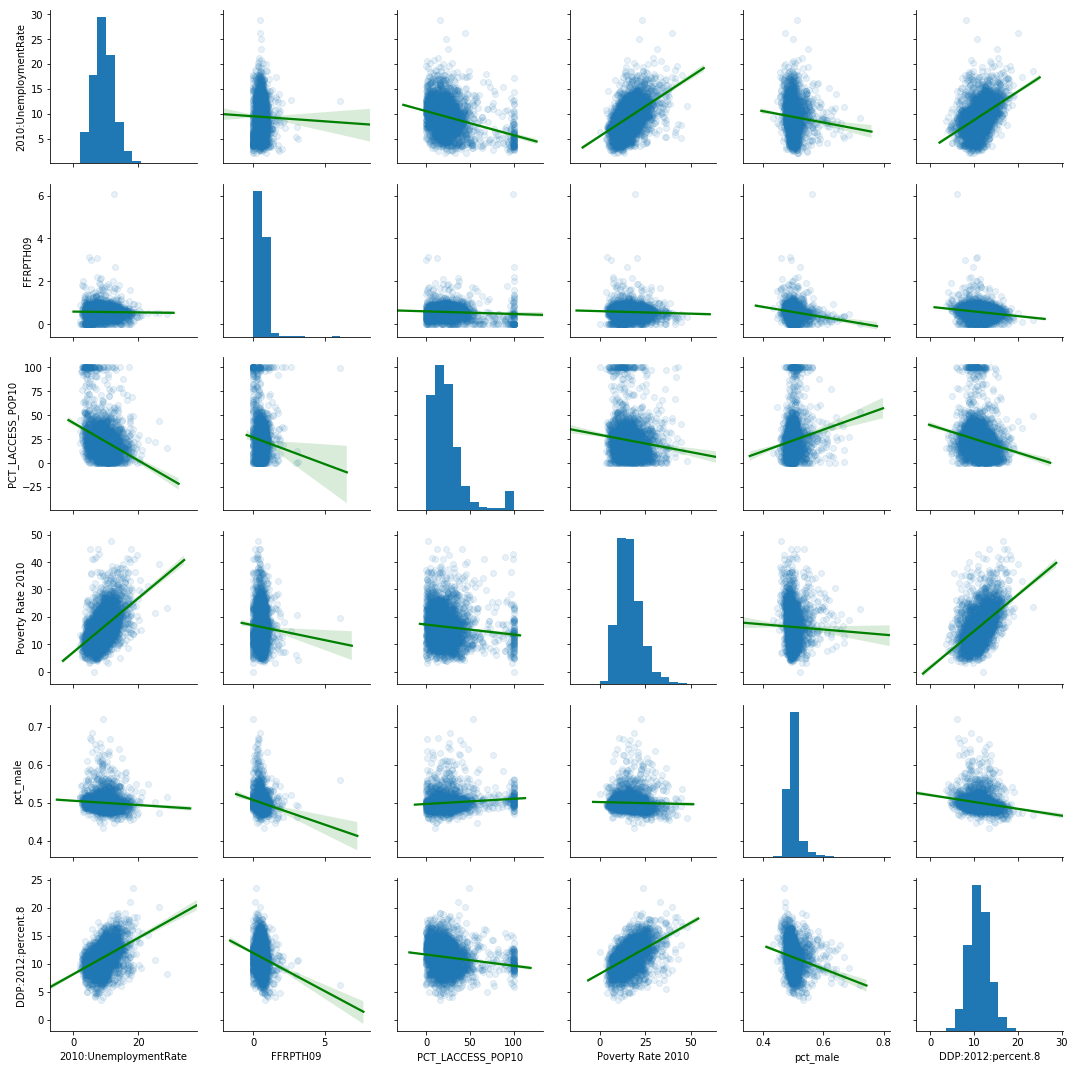

In [233]:
sns.pairplot(df[feats_all_numeric_no_ages], kind="reg", plot_kws={'line_kws':{'color':'green'}, 'scatter_kws': {'alpha': 0.1}})

### Thoughts:

Higher diabetes rates loosely follows a pattern of unemployment rates, poverty rates (which are also pretty correlated), 

In [40]:
k = df.sample(20)[feats_all_numeric_no_ages]
r = 

In [33]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/LB/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/LB/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/LB/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


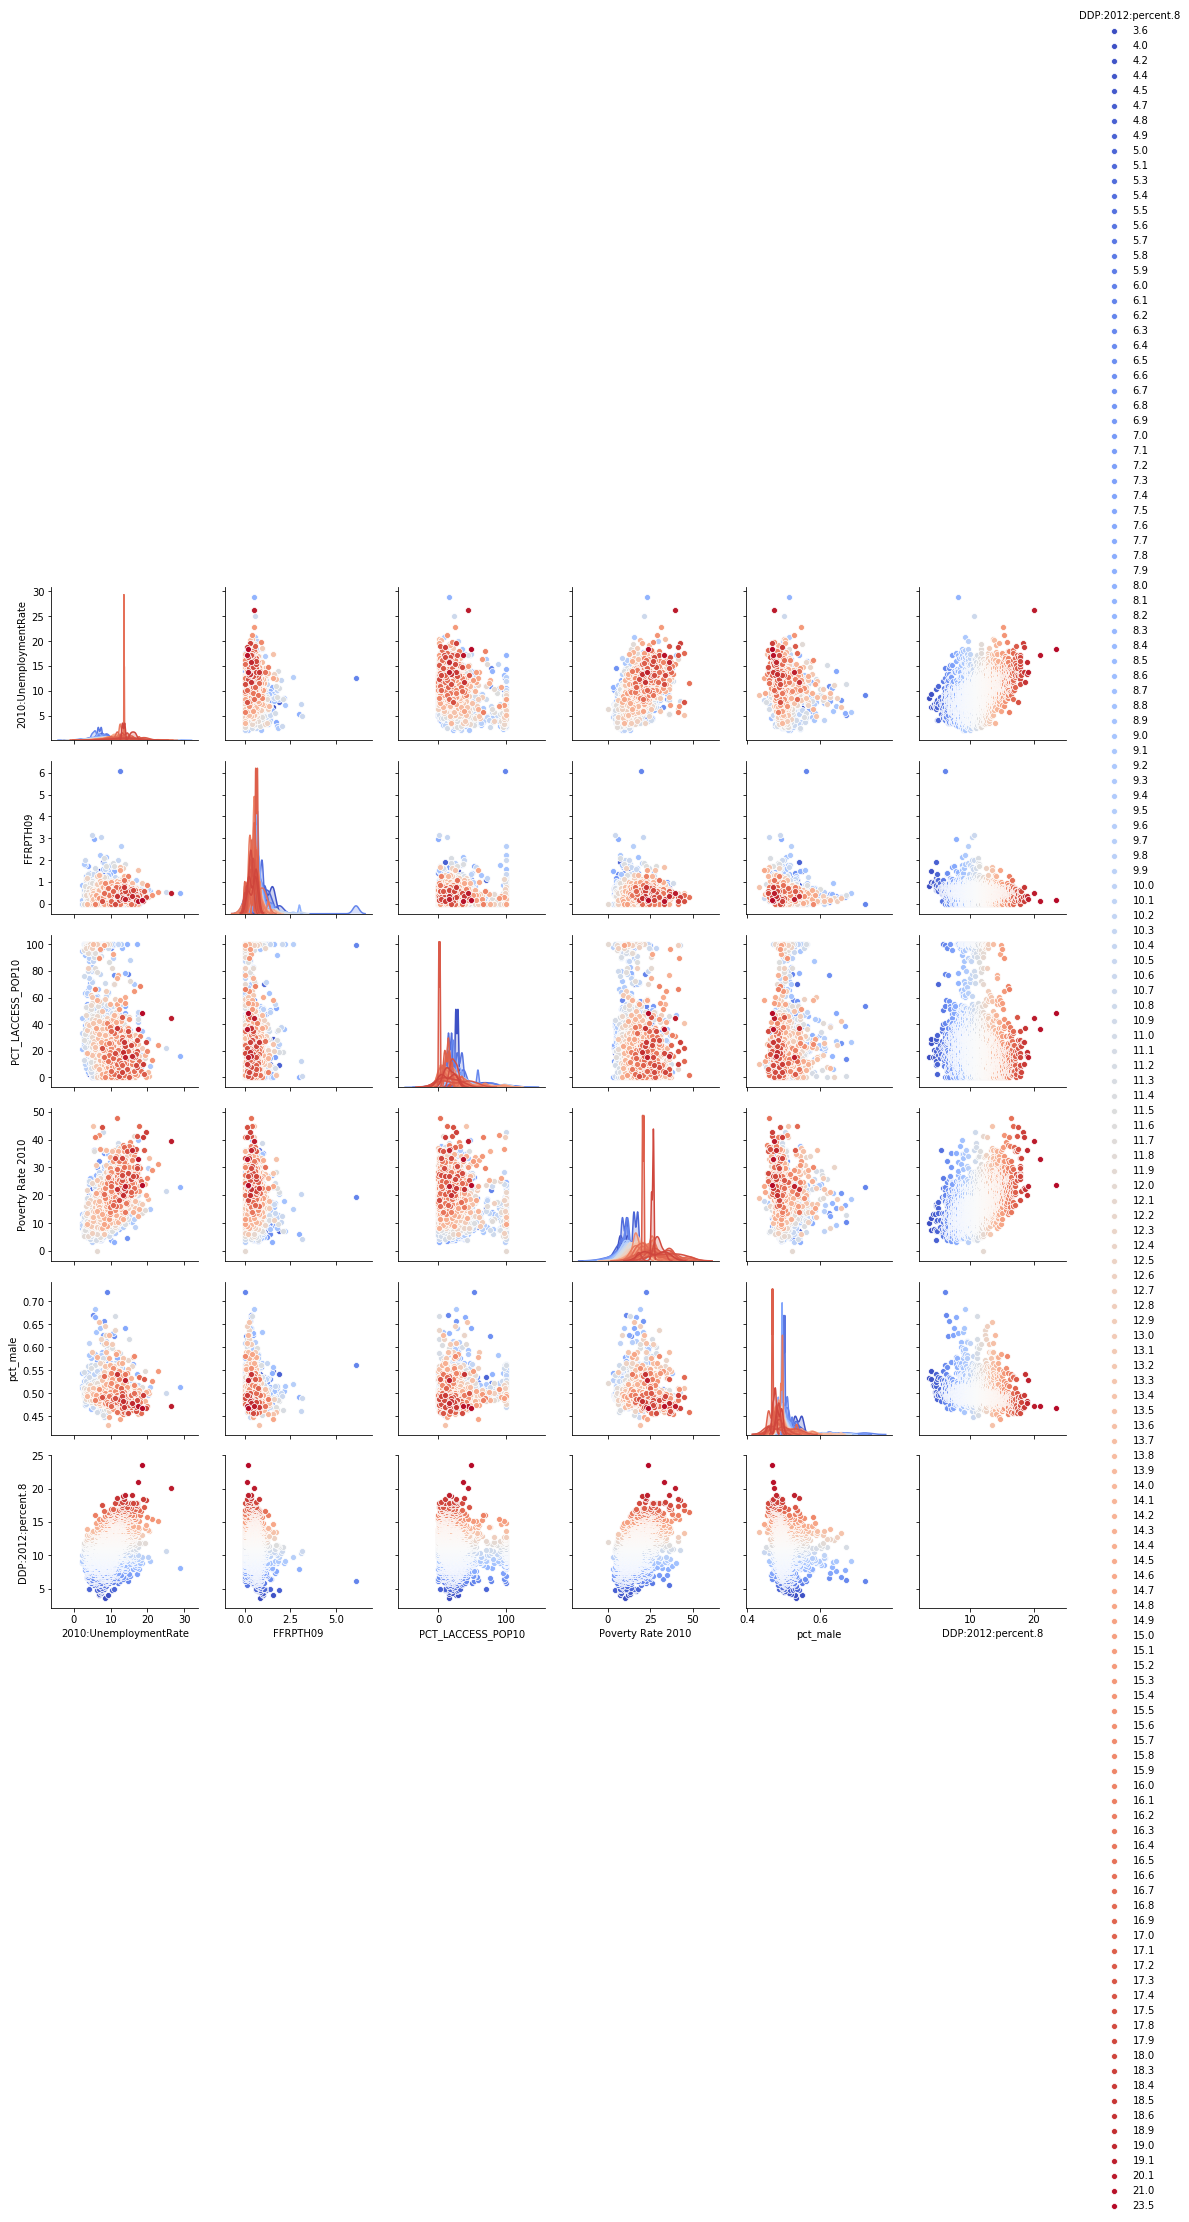

In [113]:
sns.pairplot(df[feats_all_numeric_no_ages], hue="DDP:2012:percent.8", palette='coolwarm')

['2010:UnemploymentRate',
 'FFRPTH09',
 'PCT_LACCESS_POP10',
 'Poverty Rate 2010',
 'pct_male']

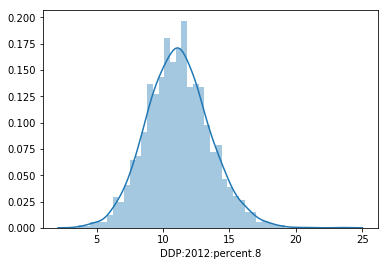

In [43]:
sns.distplot(df['DDP:2012:percent.8'])

Text(0.5,1,'Standard Correlation Matrix')

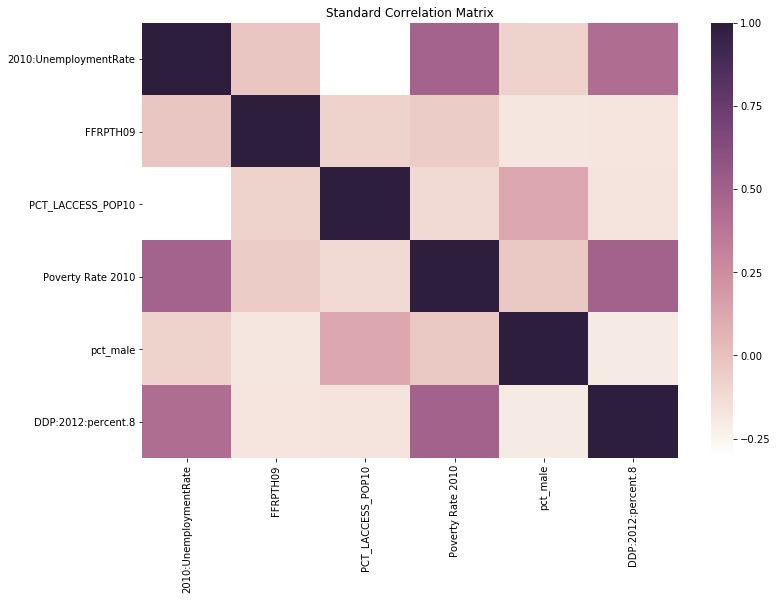

In [85]:
corr = df[feats_all_numeric_no_ages].corr()
corr
plt.figure(figsize = (12, 8))
sns.heatmap(corr, cmap=cmap)
plt.title("Standard Correlation Matrix")

In [86]:
corr

,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,DDP:2012:percent.8
2010:UnemploymentRate,1.000000,-0.019349,-0.307847,0.487942,-0.080348,0.431457
FFRPTH09,-0.019349,1.000000,-0.082671,-0.050684,-0.176205,-0.171919
PCT_LACCESS_POP10,-0.307847,-0.082671,1.000000,-0.115044,0.123904,-0.169000
Poverty Rate 2010,0.487942,-0.050684,-0.115044,1.000000,-0.032415,0.492409
pct_male,-0.080348,-0.176205,0.123904,-0.032415,1.000000,-0.193915
DDP:2012:percent.8,0.431457,-0.171919,-0.169000,0.492409,-0.193915,1.000000


Text(0.5,1,'Correlation matrix - no diagonals')

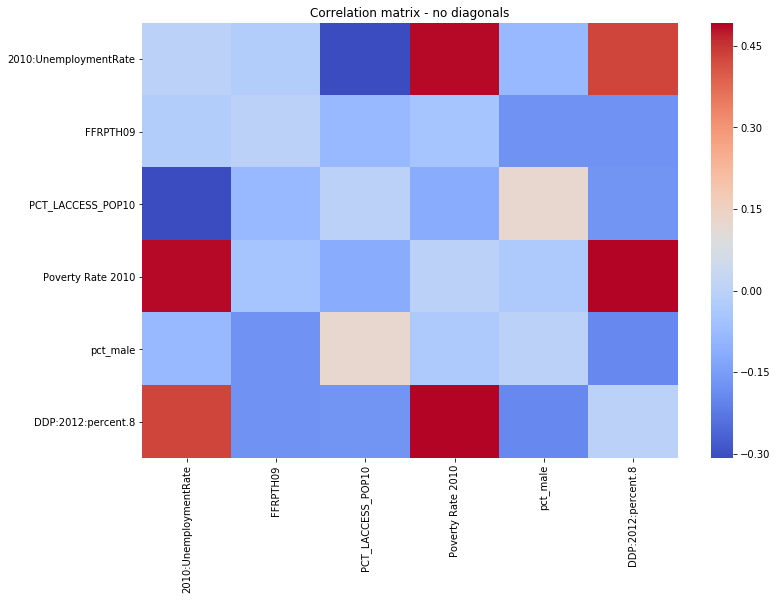

In [98]:
#Plotting when diangonals are zero (to take up less visual weight and balanace out scale)

corr.values[[np.arange(corr.shape[0])]*2] = 0
plt.figure(figsize = (12, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation matrix - no diagonals")

### Thoughts so far!

It's suprising to me that fast food, percent male,and low access to food is negativel correlated with diabetes.

There seems to be one big outlier on the FastFood. I'm going to check that out to see if it makes sense, along with other outliers. Then rerun correlations.

# Outlier Exploration

In [101]:
df[df['FFRPTH09'] > 6]  #this one outlier is really crazy. for linear regression, removing it. 


,State,County,FIPS,2010:UnemploymentRate,DDP:2012:percent.8,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,2010:AgeGroup01:0-4,...,2010:AgeGroup09:40-44,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+
296,Colorado,San Juan,8111.0,12.5,6.2,6.08828,99.24281,19.544846,0.560801,0.062101,...,0.08955,0.085474,0.08955,0.083571,0.066042,0.040495,0.013725,0.008697,0.00462,0.002718


In [102]:
df_removed_outliers = df[df['FFRPTH09'] < 6]

In [207]:
corr_removed_outliers = df_removed_outliers[feats_all_numeric].corr()

In [208]:
corr_removed_outliers.sort_values('DDP')

,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,2010:AgeGroup01:0-4,2010:AgeGroup02:5-9,2010:AgeGroup03:10-14,2010:AgeGroup04:15-19,2010:AgeGroup05:20-24,...,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+,DDP:2012:percent.8
2010:UnemploymentRate,1.000000,-0.026674,-0.309777,0.487878,-0.081332,-0.038356,-0.011043,0.011364,0.055499,0.085589,...,0.004887,-0.111511,-0.085583,0.031979,0.012350,-0.076926,-0.192320,-0.250317,-0.302742,0.432484
FFRPTH09,-0.026674,1.000000,-0.111121,-0.056842,-0.203983,0.023295,0.011492,-0.008855,0.022619,0.052004,...,-0.033369,-0.045304,-0.024770,-0.012570,-0.039407,-0.055367,-0.063261,-0.041818,-0.040319,-0.169219
PCT_LACCESS_POP10,-0.309777,-0.111121,1.000000,-0.115917,0.121030,0.072434,0.038808,0.029999,-0.010855,-0.038821,...,-0.050426,0.037144,0.055678,-0.017088,0.009531,0.055686,0.115767,0.134072,0.152997,-0.167001
Poverty Rate 2010,0.487878,-0.056842,-0.115917,1.000000,-0.032903,0.073476,0.053811,0.043473,0.059992,0.058429,...,-0.081493,-0.147063,-0.107173,-0.012557,-0.001122,-0.025686,-0.097751,-0.153107,-0.215241,0.493108
pct_male,-0.081332,-0.203983,0.121030,-0.032903,1.000000,0.021639,-0.001717,-0.012542,-0.048832,-0.022392,...,0.017011,0.066634,0.065362,0.030673,0.003928,-0.006615,-0.012267,-0.023486,-0.007081,-0.192452
2010:AgeGroup01:0-4,-0.038356,0.023295,0.072434,0.073476,0.021639,1.000000,0.873710,0.695589,0.326403,0.117419,...,-0.335700,-0.534607,-0.622410,-0.655937,-0.602800,-0.556504,-0.513580,-0.465942,-0.367878,-0.013393
2010:AgeGroup02:5-9,-0.011043,0.011492,0.038808,0.053811,-0.001717,0.873710,1.000000,0.867568,0.307873,-0.060337,...,-0.147190,-0.413633,-0.564233,-0.591944,-0.546994,-0.526150,-0.496238,-0.461951,-0.367129,-0.005693
2010:AgeGroup03:10-14,0.011364,-0.008855,0.029999,0.043473,-0.012542,0.695589,0.867568,1.000000,0.286735,-0.224560,...,0.027974,-0.226404,-0.421213,-0.438942,-0.406979,-0.394823,-0.383261,-0.370073,-0.298016,0.007901
2010:AgeGroup04:15-19,0.055499,0.022619,-0.010855,0.059992,-0.048832,0.326403,0.307873,0.286735,1.000000,0.699174,...,-0.397336,-0.517395,-0.566740,-0.561546,-0.526105,-0.492173,-0.461071,-0.398461,-0.297210,0.059131
2010:AgeGroup05:20-24,0.085589,0.052004,-0.038821,0.058429,-0.022392,0.117419,-0.060337,-0.224560,0.699174,1.000000,...,-0.489432,-0.580263,-0.515980,-0.513786,-0.500068,-0.496437,-0.460375,-0.391979,-0.316907,0.061473


/Users/LB/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


Text(0.5,1,'Correlation matrix - no diagonals - removed outlier')

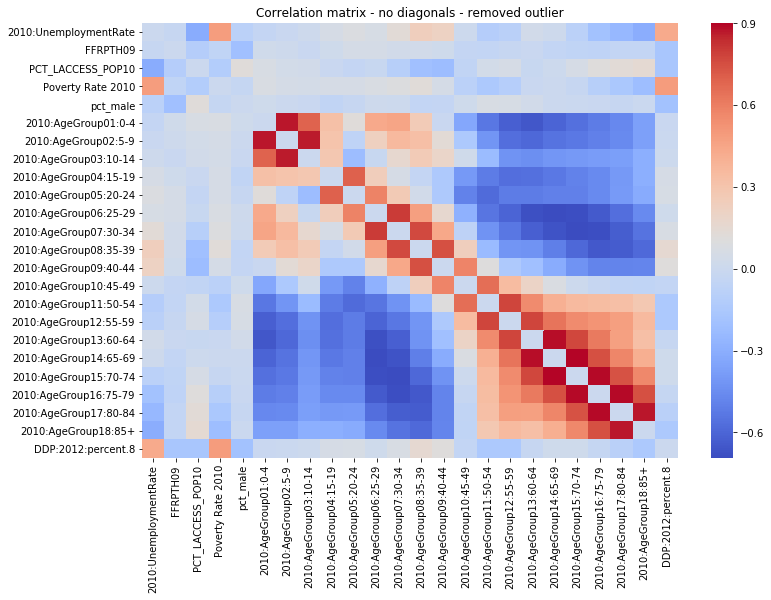

In [180]:
corr_removed_outliers.values[[np.arange(corr_removed_outliers.shape[0])]*2] = 0
plt.figure(figsize = (12, 8))
sns.heatmap(corr_removed_outliers, cmap='coolwarm')
plt.title("Correlation matrix - no diagonals - removed outlier")

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/LB/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/LB/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/LB/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


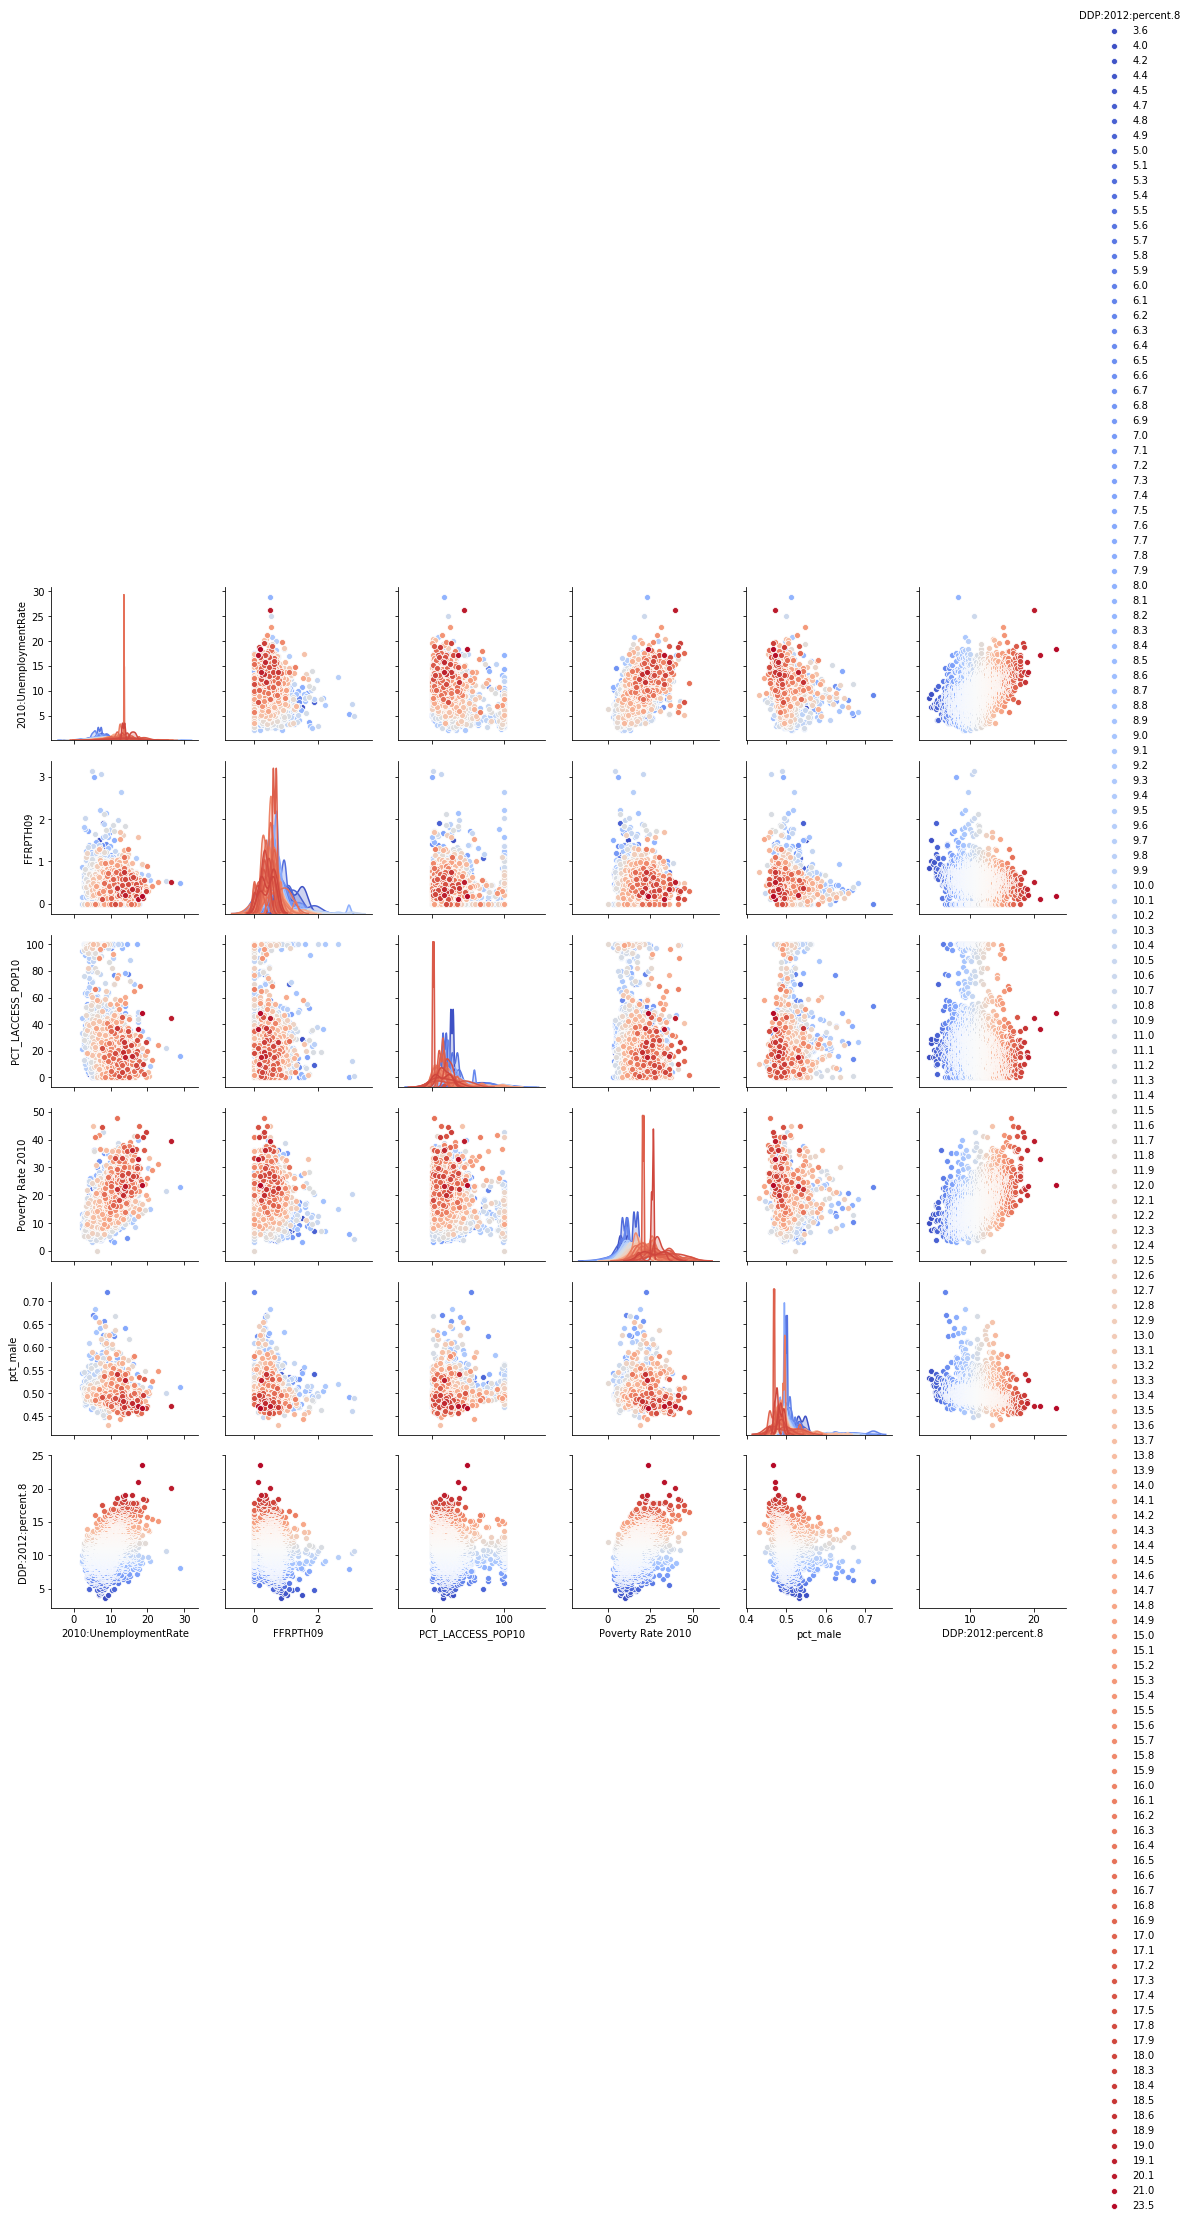

In [104]:
sns.pairplot(df_removed_outliers[feats_all_numeric_no_ages], hue="DDP:2012:percent.8", palette='coolwarm')

# NEXT STEP = Split Training/Test Data

In [118]:
from sklearn.model_selection import train_test_split

In [121]:
X = df.drop('DDP:2012:percent.8', axis = 1)
y = df['DDP:2012:percent.8']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

In [135]:
X_train.shape, y_train.shape

((2193, 26), (2193,))

In [136]:
#check to see if that one outlier is in this group
X_train[X_train['FFRPTH09'] > 6]

,State,County,FIPS,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,2010:AgeGroup01:0-4,2010:AgeGroup02:5-9,...,2010:AgeGroup09:40-44,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+
296,Colorado,San Juan,8111.0,12.5,6.08828,99.24281,19.544846,0.560801,0.062101,0.055986,...,0.08955,0.085474,0.08955,0.083571,0.066042,0.040495,0.013725,0.008697,0.00462,0.002718


In [138]:
X_train[X_train['FFRPTH09'] > 6].index.values[0]

296

In [141]:
X_train.iloc[296]

State                    North Dakota
County                      Williams 
FIPS                            38105
2010:UnemploymentRate             2.2
FFRPTH09                     0.870761
PCT_LACCESS_POP10             21.3547
Poverty Rate 2010              8.1298
pct_male                     0.515582
2010:AgeGroup01:0-4         0.0673905
2010:AgeGroup02:5-9         0.0700525
2010:AgeGroup03:10-14        0.069352
2010:AgeGroup04:15-19       0.0687916
2010:AgeGroup05:20-24       0.0534851
2010:AgeGroup06:25-29       0.0526445
2010:AgeGroup07:30-34       0.0577583
2010:AgeGroup08:35-39       0.0654291
2010:AgeGroup09:40-44       0.0686515
2010:AgeGroup10:45-49        0.073345
2010:AgeGroup11:50-54        0.076007
2010:AgeGroup12:55-59       0.0692469
2010:AgeGroup13:60-64       0.0596848
2010:AgeGroup14:65-69        0.049317
2010:AgeGroup15:70-74       0.0365324
2010:AgeGroup16:75-79       0.0274256
2010:AgeGroup17:80-84       0.0191944
2010:AgeGroup18:85+         0.0156918
Name: 2036, 

In [142]:
y_train[296]

6.2

In [144]:
X_train = X_train.drop(296)
y_train = y_train.drop(296)

In [145]:
X_train.shape

(2192, 26)

In [146]:
y_train.shape

(2192,)

# Model 0: Assume Average for al Counties: MSE

In [317]:
X_train.shape

(2192, 26)

In [320]:
avg = y_train.mean()
avg

11.179105839416067

In [325]:
y_pred_avg = np.array([avg] * X_train.shape[0])
y_pred_avg

array([11.17910584, 11.17910584, 11.17910584, ..., 11.17910584,
       11.17910584, 11.17910584])

In [352]:
avg_model_mse = mean_squared_error(y_train, y_pred_avg)
avg_model_mse

5.713924747922106

### MSE of "guess average diabetes rate" model (i.e. no model) = 5.71
(ideal = 0)

# Model Group A: Linear Regression

## (A) Linear Model 1: Making a simple linear regression model with just uneployment and poverty rate (the two most-relationship seeming)

In [327]:
def r2_to_adjusted_r2(r2, n, p):
    return r2 - ((1-r2) * (p / (n - p - 1)))

### #1 - using top 2 from coefficient matrix (unemployment & poverty)

In [328]:
model1 = LinearRegression()

In [334]:
cross_val_R2_1 = cross_val_score(model1, X_train[[unemp2019, pov2010]], y_train, cv=5,scoring='neg_mean_squared_error')
#'negative' MSE because Sklean follows convention that higher scores are always better than lower scores. (and ideal MSE = 0)
cross_val_R2_1

array([-4.29639511, -3.907093  , -4.28082507, -4.12190576, -3.85193681])

In [335]:
cross_val_R2_1.mean()

-4.091631150194687

In [336]:
(5.71 - 4.09) / 5.71

0.28371278458844135

### MSE of linear model with 2 = 4.09 --> 28% better!

In [215]:
# Hashing out adjsuted R2! not using that metric anymore

# cross_val_R2_1 = cross_val_score(model1, X_train[[unemp2019, pov2010]], y_train, cv=5)
# cross_val_adjusted_R2_1 = r2_to_adjusted_r2(cross_val_R2_1, X_train[[unemp2019, pov2010]].shape[0], X_train[[unemp2019, pov2010]].shape[1])
# cross_val_adjusted_R2_1

array([0.25240496, 0.26094969, 0.28845621, 0.31302219, 0.29673736])

In [217]:
model1.fit(X_train[[unemp2019, pov2010]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [225]:
model1.score(X_train[[unemp2019, pov2010]], y_train)   #this is r2 --> not using

0.28576076775358095

In [218]:
model1.coef_

array([0.17165523, 0.14198194])

In [237]:
#also using statsmodels, wihch has a nice way at looking at pvalues
import statsmodels.api as sm
X_train_1_sm = sm.add_constant(X_train[[unemp2019, pov2010]], prepend=False)
model_sm = sm.OLS(np.array(y_train), np.array(X_train_1_sm))
results = model_sm.fit()
results.summary()

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     437.9
Date:                Wed, 27 Mar 2019   Prob (F-statistic):          1.08e-160
Time:                        16:26:23   Log-Likelihood:                -4651.7
No. Observations:                2192   AIC:                             9309.
Df Residuals:                    2189   BIC:                             9326.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1717      0.016     10.967      0.000       0.141       0.202
x2             0.1420      0.008     18.720      0.000       0.127       0.157
const          7.2532      0.145     49.962      0.000       6.968       7.538
==============================================================================
Omnibus:                       58.745   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.316
Skew:                          -0.335   Prob(JB):                     3.27e-16
Kurtosis:                       3.576   Cond. No.                         67.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

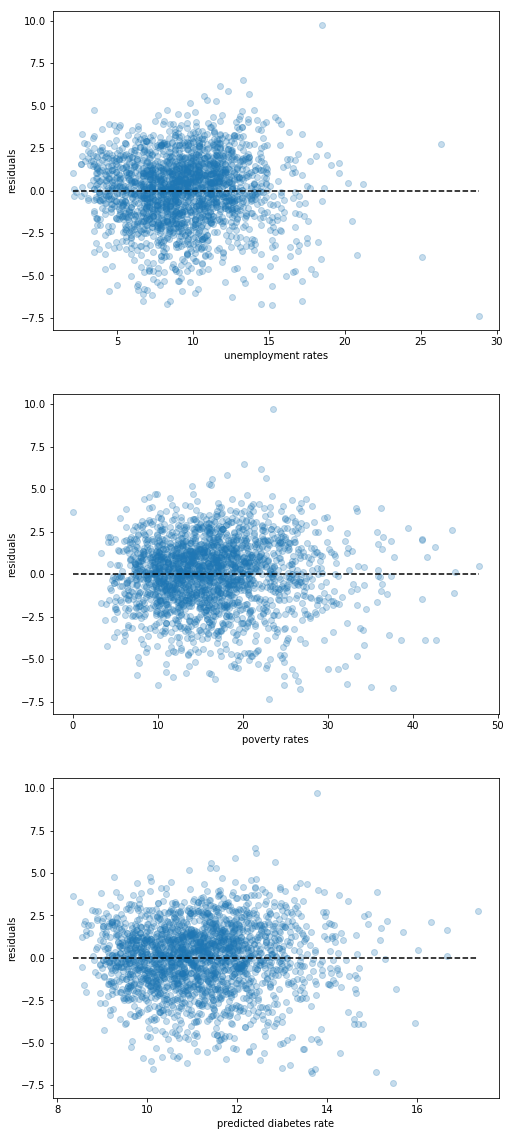

In [243]:
fig, axs = plt.subplots(3,1, figsize=(8,20))

axs[0].scatter(X_train[unemp2019], results.resid, alpha = .25)
axs[0].hlines(0,
              X_train[unemp2019].min(), 
              X_train[unemp2019].max(), 
              'k', linestyle='dashed')
axs[0].set_xlabel('unemployment rates')
axs[0].set_ylabel('residuals');

axs[1].scatter(X_train[pov2010], results.resid, alpha = .25)
axs[1].hlines(0,
              X_train[pov2010].min(), 
              X_train[pov2010].max(), 
              'k', linestyle='dashed')
axs[1].set_xlabel('poverty rates')
axs[1].set_ylabel('residuals');

axs[2].scatter(results.fittedvalues, results.resid, alpha = .25)
axs[2].hlines(0,
              results.fittedvalues.min(), 
              results.fittedvalues.max(),
              'k', linestyle='dashed')
axs[2].set_xlabel('predicted diabetes rate')
axs[2].set_ylabel('residuals');

In [244]:
#What do I take from this? these values are more blobby...not really linear. There are a LOT of values that cluster around specific areas.

#homeo-skadic-ish... (not widely in any other pattern (?))

### #2/3 - using *just* unemployment and poverty, as those two correlate more than others - does one do better on their own? 

In [227]:
cols = [unemp2019]

model2 = LinearRegression()
cross_val_R2_2 = cross_val_score(model2, X_train[cols], y_train, cv=5)
cross_val_adjusted_R2_2 = r2_to_adjusted_r2(cross_val_R2_2, X_train[cols].shape[0], X_train[cols].shape[1])
cross_val_adjusted_R2_2   #WORSE!!

array([0.1783774 , 0.11382297, 0.16114863, 0.1927365 , 0.19690713])

In [337]:
cross_val_adjusted_mse_2 = cross_val_score(model2, X_train[cols], y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_adjusted_mse_2

array([-4.57881247, -3.97372501, -4.41314319, -4.42990524, -4.15685127])

In [338]:
cross_val_adjusted_mse_2.mean()

-4.310487436743371

In [228]:
cols = [pov2010]  

model3 = LinearRegression()
cross_val_R2_3 = cross_val_score(model3, X_train[cols], y_train, cv=5)
cross_val_adjusted_R2_3 = r2_to_adjusted_r2(cross_val_R2_3, X_train[cols].shape[0], X_train[cols].shape[1])
cross_val_adjusted_R2_3  #Worse than both, but better the other! (..which is expected based on )

array([0.20362668, 0.24868906, 0.2667977 , 0.26202656, 0.24141452])

###   #4 Using all avaialable rows (good measure, although I dont think this is a linear regression problem)

In [254]:
model4 = LinearRegression()

In [255]:
feats_all_numeric_no_target = feats_all_numeric[:-1]

In [260]:
cross_val_R2_4 = cross_val_score(model4, X_train[feats_all_numeric_no_target], y_train, cv=5)
cross_val_adjusted_R2_4 = r2_to_adjusted_r2(cross_val_R2_4, X_train[feats_all_numeric_no_target].shape[0], X_train[feats_all_numeric_no_target].shape[1])
cross_val_adjusted_R2_4

array([0.40187412, 0.36383185, 0.35107737, 0.37956949, 0.35362434])

In [339]:
cross_val_mse_4 = cross_val_score(model4, X_train[feats_all_numeric_no_target], y_train, cv=5, scoring = 'neg_mean_squared_error')
print('mean MSE',cross_val_mse_4.mean())
cross_val_mse_4


mean -3.5590550850850464


array([-3.40442612, -3.33092752, -3.86662703, -3.68690558, -3.50638919])

In [340]:
(5.71 - 3.56) / 5.71

0.3765323992994746

#### MSE of linear model when using all columns -> -3.56  --> 38% better than with avg (no) model.

In [262]:
model4.fit(X_train[feats_all_numeric_no_target], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [263]:
model4.coef_

array([ 1.36814507e-01, -1.53774622e+00, -2.25618282e-03,  1.34373549e-01,
       -2.02404908e+01, -1.00964991e-01, -1.48071825e+01, -5.99900763e+00,
       -2.24343656e-02,  4.18636140e+00, -2.15871184e+01,  9.89719935e-01,
        3.77804425e+01,  8.76318352e+00,  3.38666066e+00, -2.75928660e+00,
       -3.88489146e+01, -1.24933436e+01, -1.69896441e+01,  5.34581556e+01,
        2.56666323e+01, -1.01114181e+01, -1.05118410e+01])

In [264]:
import statsmodels.api as sm
X_train_sm_4 = sm.add_constant(X_train[feats_all_numeric_no_target], prepend=False)
mod = sm.OLS(np.array(y_train), np.array(X_train_sm_4))
res = mod.fit()
res.summary()

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     64.94
Date:                Wed, 27 Mar 2019   Prob (F-statistic):          2.99e-219
Time:                        16:44:42   Log-Likelihood:                -4465.9
No. Observations:                2192   AIC:                             8978.
Df Residuals:                    2169   BIC:                             9109.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1368      0.016      8.579      0.000       0.106       0.168
x2            -1.5377      0.146    -10.506      0.000      -1.825      -1.251
x3            -0.0023      0.002     -1.062      0.288      -0.006       0.002
x4             0.1344      0.007     18.798      0.000       0.120       0.148
x5           -20.2405      1.885    -10.736      0.000     -23.938     -16.543
x6             0.9632      9.226      0.104      0.917     -17.130      19.057
x7           -13.7430     12.270     -1.120      0.263     -37.806      10.320
x8            -4.9348     10.780     -0.458      0.647     -26.076      16.206
x9             1.0418      7.360      0.142      0.887     -13.391      15.474
x10            5.2506      4.039      1.300      0.194      -2.670      13.171
x11          -20.5229      8.171     -2.512      0.012     -36.547      -4.499
x12            2.0539     10.993      0.187      0.852     -19.505      23.612
x13           38.8446     11.375      3.415      0.001      16.537      61.152
x14            9.8274     10.272      0.957      0.339     -10.316      29.971
x15            4.4509      9.688      0.459      0.646     -14.548      23.450
x16           -1.6951     10.110     -0.168      0.867     -21.522      18.132
x17          -37.7847      9.733     -3.882      0.000     -56.872     -18.697
x18          -11.4291     10.006     -1.142      0.253     -31.051       8.193
x19          -15.9254     10.961     -1.453      0.146     -37.421       5.570
x20           54.5224     14.383      3.791      0.000      26.316      82.729
x21           26.7308     16.091      1.661      0.097      -4.825      58.287
x22           -9.0472     17.670     -0.512      0.609     -43.698      25.604
x23           -9.4476     11.180     -0.845      0.398     -31.373      12.478
const         19.1557      0.938     20.429      0.000      17.317      20.994
==============================================================================
Omnibus:                       30.881   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.167
Skew:                          -0.165   Prob(JB):                     4.23e-10
Kurtosis:                       3.603   Cond. No.                     1.71e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.96e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [280]:
col_indices_small_p = np.argwhere(abs(res.pvalues) < .01)
col_indices_small_p = col_indices_small_p[:-1]  #not counting constant
col_indices_small_p

array([[ 0],
       [ 1],
       [ 3],
       [ 4],
       [12],
       [16],
       [19]])

In [288]:
col_names_small_p = X_train[feats_all_numeric_no_target].columns[col_indices_small_p]
col_names_small_p = list(col_names_small_p)
col_names_small_p

['2010:UnemploymentRate',
 'FFRPTH09',
 'Poverty Rate 2010',
 'pct_male',
 '2010:AgeGroup08:35-39',
 '2010:AgeGroup12:55-59',
 '2010:AgeGroup15:70-74']

###   #5 Using columns which had really low p-values


#### MSE was -3.54  --> i could essentially go without all the other columns and do the same

In [283]:
model5 = LinearRegression()

In [289]:
cross_val_R2_5 = cross_val_score(model5, X_train[col_names_small_p], y_train, cv=5)
cross_val_adjusted_R2_5 = r2_to_adjusted_r2(cross_val_R2_5, X_train[feats_all_numeric_no_target].shape[0], X_train[feats_all_numeric_no_target].shape[1])
cross_val_adjusted_R2_5

array([0.40868492, 0.37842191, 0.36231567, 0.37180142, 0.34467809])

In [342]:
cross_val_mse_5 = cross_val_score(model5, X_train[col_names_small_p], y_train, cv=5, scoring='neg_mean_squared_error')
print ('mean MSE:', cross_val_mse_5.mean())
cross_val_mse_5

mean MSE: -3.5415691310237016


array([-3.36566026, -3.25453508, -3.79966322, -3.73306728, -3.55491982])

In [292]:
model5.fit(X_train[col_names_small_p], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [293]:
model5.coef_

array([  0.14457508,  -1.56309899,   0.13236827, -21.08281922,
        36.58923338, -40.70690575,  50.76473487])

In [294]:
import statsmodels.api as sm
X_train_sm_5 = sm.add_constant(X_train[col_names_small_p], prepend=False)
mod = sm.OLS(np.array(y_train), np.array(X_train_sm_5))
res = mod.fit()
res.summary()

/Users/LB/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     196.5
Date:                Wed, 27 Mar 2019   Prob (F-statistic):          2.27e-226
Time:                        17:00:58   Log-Likelihood:                -4485.1
No. Observations:                2192   AIC:                             8986.
Df Residuals:                    2184   BIC:                             9032.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1446      0.015      9.657      0.000       0.115       0.174
x2            -1.5631      0.145    -10.807      0.000      -1.847      -1.279
x3             0.1324      0.007     18.689      0.000       0.118       0.146
x4           -21.0828      1.874    -11.252      0.000     -24.757     -17.408
x5            36.5892      5.899      6.202      0.000      25.020      48.158
x6           -40.7069      4.708     -8.646      0.000     -49.939     -31.474
x7            50.7647      5.434      9.342      0.000      40.109      61.421
const         17.8596      1.111     16.069      0.000      15.680      20.039
==============================================================================
Omnibus:                       43.843   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.553
Skew:                          -0.226   Prob(JB):                     4.30e-14
Kurtosis:                       3.685   Cond. No.                     3.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#plot residuals for everything    ####TOMORROW: PLOT RESIDUALS OF THESE, THEN TOMORROW TRY RANDOM FOREST! FOREST!!!!
## DO REGULARIZATION! MAKE COEFFICENTS MUCH SMALLER!!!


fig, axs = plt.subplots(3,1, figsize=(8,20))

axs[0].scatter(X_train[unemp2019], results.resid, alpha = .25)
axs[0].hlines(0,
              X_train[unemp2019].min(), 
              X_train[unemp2019].max(), 
              'k', linestyle='dashed')
axs[0].set_xlabel('unemployment rates')
axs[0].set_ylabel('residuals');

#### Going from R^2 to Adjusted R^2 
 = R^2  -  ( (1 -  R^2) * (p / (n - p - 1))    (Where p= # of features (not including intercpt), n = # of rows), 

= 0.397 - ((1 - 0.397) *  (22 / ( 2192 - 22 - 1)))

In [ ]:
# Learning:
Based on corr matrix, looked like 

In [ ]:
## SEcond Pass: Just

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

feats_all_numeric_no_target = feats_all_numeric[:-1]
feats_all_numeric_no_target

cross_val_R2_1 = cross_val_score(model, X_train[feats_all_numeric_no_target], y_train, cv=5)
cross_val_R2_1

def r2_to_adjusted_r2(r2, n, p):
    return r2 - ((1-r2) * (p / (n - p - 1)))
    

cross_val_adjusted_R2_1 = r2_to_adjusted_r2(cross_val_R2_1, X_train[feats_all_numeric_no_target].shape[0], X_train[feats_all_numeric_no_target].shape[1])
cross_val_adjusted_R2_1

model.fit(X_train[feats_all_numeric_no_target], y_train)

model.coef_

model.

import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[feats_all_numeric_no_target], prepend=False)
mod = sm.OLS(np.array(y_train), np.array(X_train_sm))
res = mod.fit()
res.summary()

res.rsquared

res.rsquared_adj

#### Going from R^2 to Adjusted R^2 
 = R^2  -  ( (1 -  R^2) * (p / (n - p - 1))    (Where p= # of features (not including intercpt), n = # of rows), 

= 0.397 - ((1 - 0.397) *  (22 / ( 2192 - 22 - 1)))

In [234]:
#sns.palplot(sns.cubehelix_palette())

# Model #2 -> Random forest(s)

### Plan:
 - Do one with just numbers  (evaluate with MSE)
 - Do one with *state* also (dummy) 
 - Plot partial dependence plots
 - 

In [347]:
model_r1 = RandomForestRegressor(n_estimators = 100, oob_score=True)

In [348]:
model_r1.fit(X_train[feats_all_numeric_no_target], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [349]:
#cross_val_score(model_r1, X_train[feats_all_numeric_no_target], y_train, cv = 5)   #default score is R2

In [343]:
model_r1.oob_score_   #R2

0.45787003193560605

In [346]:
y_pred_rf1 = model_r1.oob_prediction_

In [353]:
rf1_mse = mean_squared_error(y_train, y_pred_rf1)
rf1_mse

3.0976898411133615

In [355]:
( rf1_mse -  avg_model_mse ) /  avg_model_mse

-0.45787003193560605

#### MSE of Random Forest model with all columns  = 3.09 --> 46% decrease in MSE (=46% improvement!)

In [358]:
X_train.head(10).index.values

array([1211, 1514, 2503, 2818, 1167, 2986, 2751, 1434, 1729,  897])

In [359]:
X_train.tail(10).index.values

array([1169,  763, 1845,  898,  919, 1164,  500, 2989,  421, 1829])

# Model 4: Random Forest with State Dummies

In [365]:
states = pd.get_dummies(X_train['State'], prefix='S:')

In [371]:
X_train.head()

,State,County,FIPS,2010:UnemploymentRate,FFRPTH09,PCT_LACCESS_POP10,Poverty Rate 2010,pct_male,2010:AgeGroup01:0-4,2010:AgeGroup02:5-9,...,2010:AgeGroup09:40-44,2010:AgeGroup10:45-49,2010:AgeGroup11:50-54,2010:AgeGroup12:55-59,2010:AgeGroup13:60-64,2010:AgeGroup14:65-69,2010:AgeGroup15:70-74,2010:AgeGroup16:75-79,2010:AgeGroup17:80-84,2010:AgeGroup18:85+
1211,Massachusetts,Barnstable,25001.0,9.9,0.990768,50.352994,9.034328,0.476423,0.046640,0.050465,...,0.063969,0.079242,0.082016,0.077253,0.071285,0.051921,0.038508,0.033341,0.029759,0.032312
1514,Missouri,Gentry,29075.0,7.9,0.890208,3.307962,17.678462,0.483526,0.062121,0.058683,...,0.059762,0.066950,0.067187,0.062088,0.053653,0.040920,0.031278,0.026125,0.020769,0.021158
2503,Tennessee,Sumner,47165.0,8.9,0.566683,28.204244,9.771492,0.487964,0.066993,0.073345,...,0.073984,0.080778,0.073263,0.062114,0.052275,0.039177,0.028143,0.020416,0.012803,0.010134
2818,Virginia,Appomattox,51011.0,8.6,0.270051,2.969736,16.420639,0.486876,0.056746,0.044180,...,0.072341,0.065541,0.058321,0.054078,0.045355,0.029832,0.018745,0.013996,0.010822,0.013558
1167,Louisiana,West Baton Rouge Parish,22121.0,7.9,0.685166,16.493161,14.927769,0.491761,0.066098,0.067821,...,0.057653,0.071958,0.070234,0.064202,0.060065,0.050586,0.044381,0.034385,0.021113,0.017925


In [366]:
states.head()

,S:_Alabama,S:_Alaska,S:_Arizona,S:_Arkansas,S:_California,S:_Colorado,S:_Connecticut,S:_Delaware,S:_Florida,S:_Georgia,...,S:_South Dakota,S:_Tennessee,S:_Texas,S:_Utah,S:_Vermont,S:_Virginia,S:_Washington,S:_West Virginia,S:_Wisconsin,S:_Wyoming
1211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2503,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [372]:
X_train_states = X_train.drop(['State', "County", 'FIPS'], axis=1).join(states)

In [374]:
X_train_states.columns

Index(['2010:UnemploymentRate', 'FFRPTH09', 'PCT_LACCESS_POP10',
       'Poverty Rate 2010', 'pct_male', '2010:AgeGroup01:0-4',
       '2010:AgeGroup02:5-9', '2010:AgeGroup03:10-14', '2010:AgeGroup04:15-19',
       '2010:AgeGroup05:20-24', '2010:AgeGroup06:25-29',
       '2010:AgeGroup07:30-34', '2010:AgeGroup08:35-39',
       '2010:AgeGroup09:40-44', '2010:AgeGroup10:45-49',
       '2010:AgeGroup11:50-54', '2010:AgeGroup12:55-59',
       '2010:AgeGroup13:60-64', '2010:AgeGroup14:65-69',
       '2010:AgeGroup15:70-74', '2010:AgeGroup16:75-79',
       '2010:AgeGroup17:80-84', '2010:AgeGroup18:85+', 'S:_Alabama',
       'S:_Alaska', 'S:_Arizona', 'S:_Arkansas', 'S:_California',
       'S:_Colorado', 'S:_Connecticut', 'S:_Delaware', 'S:_Florida',
       'S:_Georgia', 'S:_Hawaii', 'S:_Idaho', 'S:_Illinois', 'S:_Indiana',
       'S:_Iowa', 'S:_Kansas', 'S:_Kentucky', 'S:_Louisiana', 'S:_Maine',
       'S:_Maryland', 'S:_Massachusetts', 'S:_Michigan', 'S:_Minnesota',
       'S:_Mississippi',

In [375]:
model_r2 = RandomForestRegressor(n_estimators = 100, oob_score=True)

In [377]:
model_r2.fit(X_train_states, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [378]:
y_pred_rf2 = model_r2.oob_prediction_

In [379]:
rf2_mse = mean_squared_error(y_train, y_pred_rf2)
rf2_mse

2.5143905914466687